In [1]:
#importing pandas library

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:

#loading data
titanic = pd.read_csv('Titanic-Train-Data.csv')
test = pd.read_csv('Titanic-Train-Data.csv')

Checking NULL Values

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

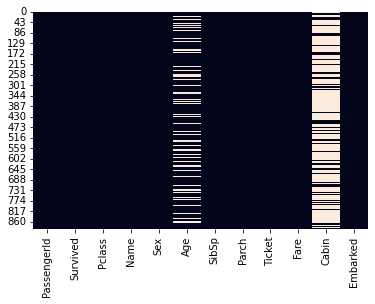

In [6]:
sns.heatmap(titanic.isnull(), cbar=False)

# Getting Basic Information about the Titanic-dataset.


In [7]:
#quick look at our data types & null counts  
titanic.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This is quite intriguing, as the cabin column has become obsolete. In the 891 columns, 687 of the rows are missing. Therefore I dropped the series from the DataFrame:

In [10]:
titanic = titanic.drop('Cabin', axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [12]:
titanic = titanic.dropna(subset = ['Embarked'])



In [13]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
titanic['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# quick way to separate numeric columns


titanic.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
# look at numeric and categorical values separately 
df_num = titanic[['Age','SibSp','Parch','Fare']]
df_cat = titanic[['Survived','Pclass','Sex','Ticket','Embarked']]

In [18]:
titanic.shape

(889, 11)

In [19]:
ages = titanic["Age"]

In [20]:
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
ages.tail()


886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

In [22]:
type(titanic["Age"])

pandas.core.series.Series

In [23]:
titanic["Age"].shape

(889,)

In [24]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 889, dtype: object

In [25]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)

In [26]:
titanic["Surname"]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 889, dtype: object

Extract the passenger data about the countesses on board of the Titanic

In [27]:
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 889, dtype: bool

In [28]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,S,Rothes


Which passenger of the Titanic has the longest name and smallest name?

In [29]:
titanic["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 889, dtype: int64

In [30]:
titanic["Name"].str.len().idxmax()

307

In [31]:
titanic["Name"].str.len().idxmin()

692

# Distributions for all Numerical Variables


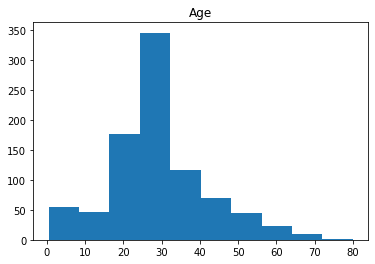

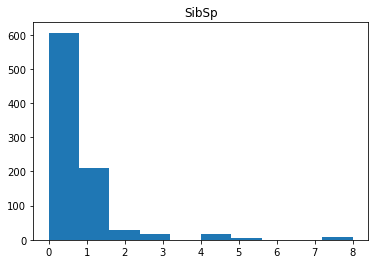

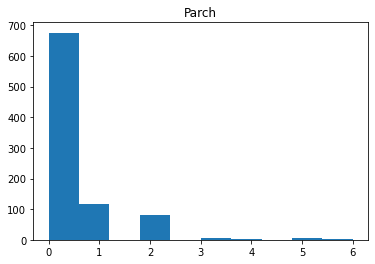

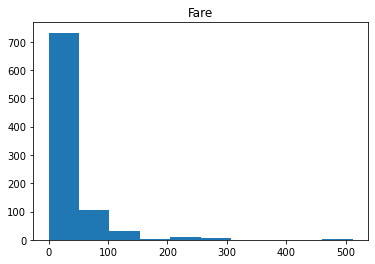

In [32]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.231875 -0.178232  0.088604
SibSp -0.231875  1.000000  0.414542  0.160887
Parch -0.178232  0.414542  1.000000  0.217532
Fare   0.088604  0.160887  0.217532  1.000000


<AxesSubplot:>

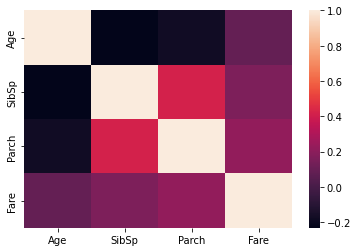

In [33]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [34]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(titanic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.4151,22.117887,0.329690,0.553734
1,28.4236,48.209498,0.467647,0.476471


# Distributions for all categorical variables



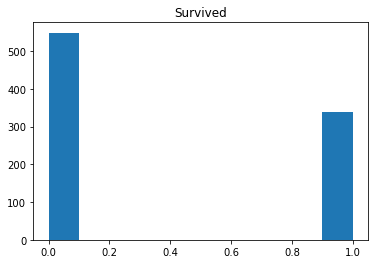

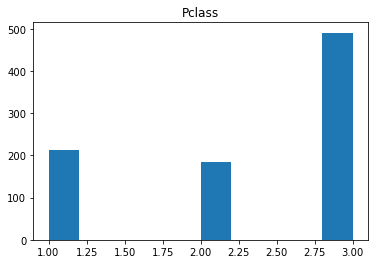

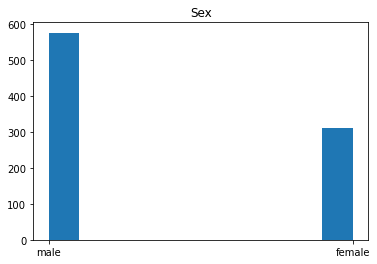

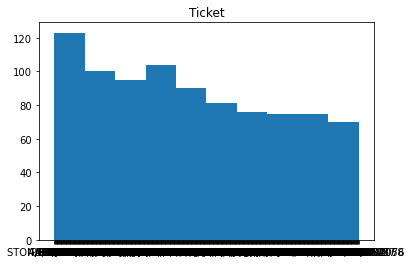

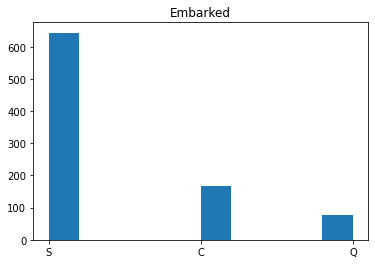

In [35]:
for i in df_cat.columns:
    plt.hist(df_cat[i])
    plt.title(i)
    plt.show()

          Survived    Pclass
Survived  1.000000 -0.335549
Pclass   -0.335549  1.000000


<AxesSubplot:>

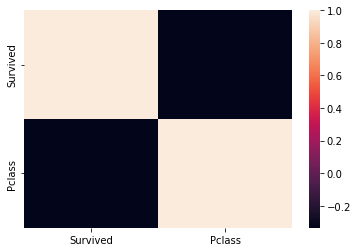

In [36]:
print(df_cat.corr())
sns.heatmap(df_cat.corr())


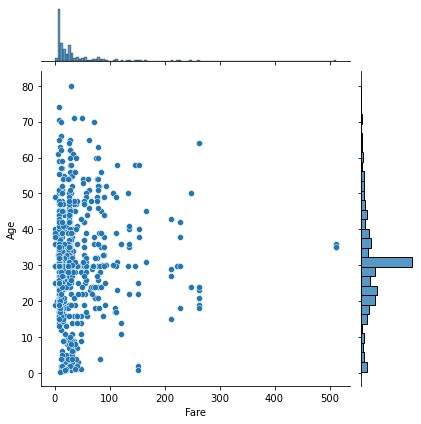

In [37]:
#Explore one or more columns by plotting a graph below: 
sns.jointplot(x='Fare',y='Age',data=titanic)

/Users/pradeepvallepalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

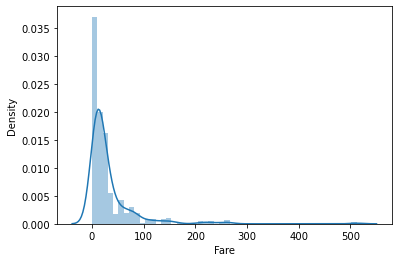

In [38]:
sns.distplot(titanic['Fare'])

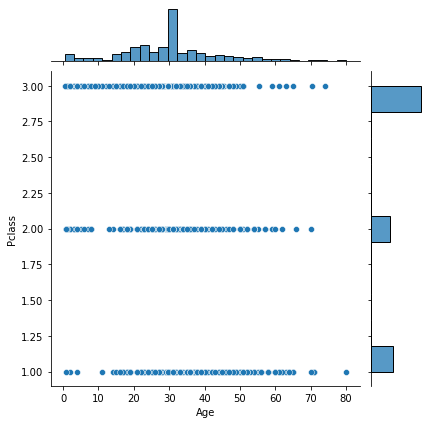

In [39]:
sns.jointplot(x='Age',y='Pclass',data=titanic)

/Users/pradeepvallepalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

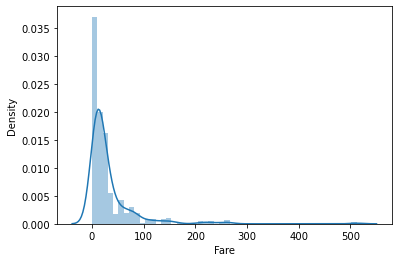

In [40]:
sns.distplot(titanic['Fare'])

Text(0.5, 1.0, 'data.corr()')

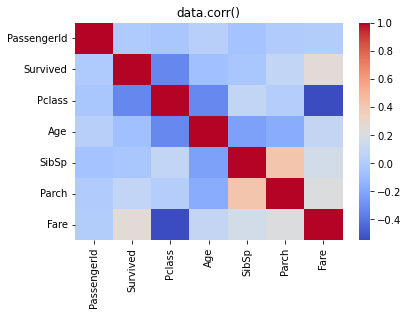

In [41]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('data.corr()')

<AxesSubplot:>

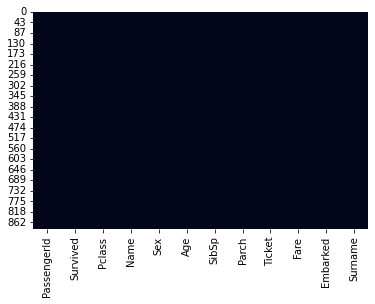

In [42]:
sns.heatmap(titanic.isnull(), cbar=False)

<AxesSubplot:>

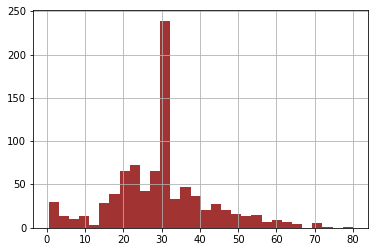

In [43]:
titanic['Age'].hist(bins = 30, color = 'darkred', alpha = 0.8)

In [44]:
def bar_chart (feature):
    survived = titanic[titanic["Survived"]==1][feature].value_counts()
    dead = titanic[titanic["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["Survived","Dead"]
    df.plot(kind="bar",stacked=True,figsize=(10,5))

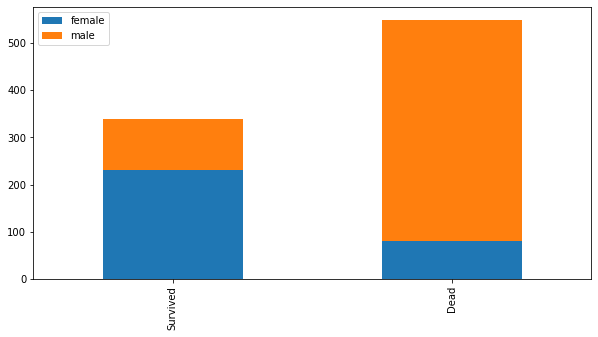

In [45]:
bar_chart("Sex")

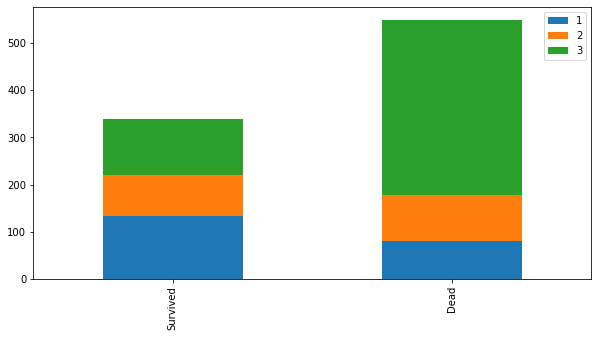

In [46]:
bar_chart("Pclass")

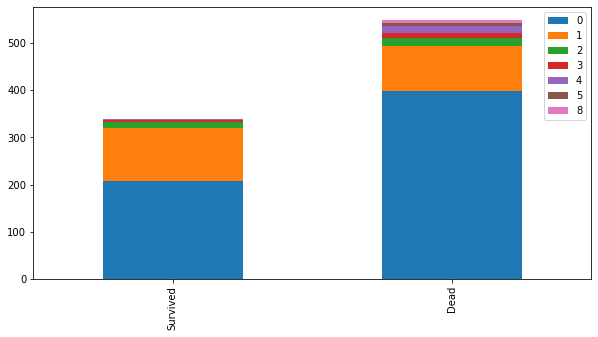

In [47]:
bar_chart("SibSp")

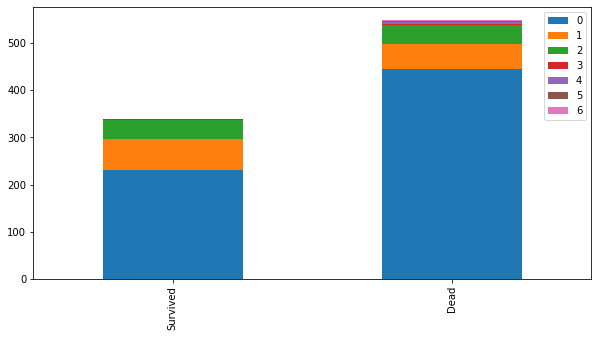

In [48]:
bar_chart("Parch")

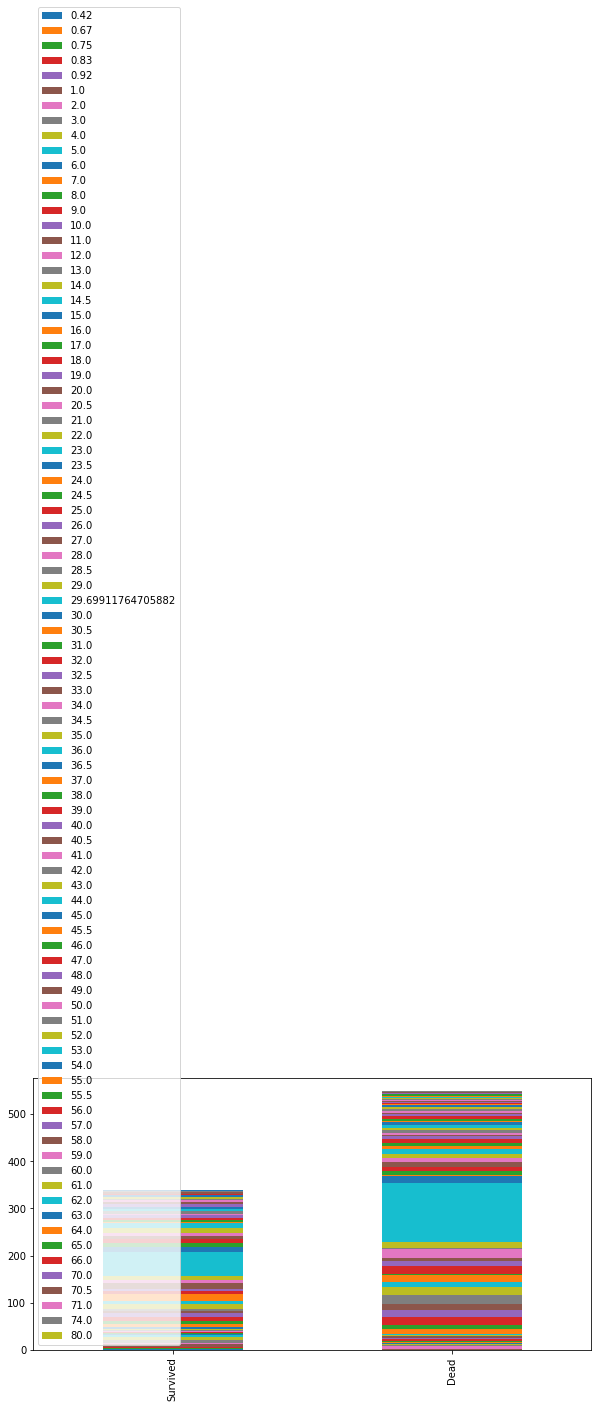

In [49]:
bar_chart("Age")

In [50]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

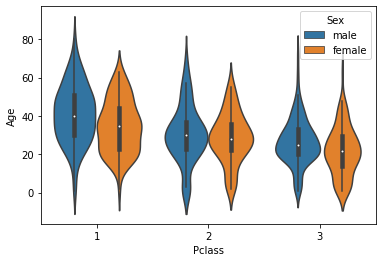

In [51]:
import seaborn
    
sb.violinplot(x="Pclass", y="Age", hue='Sex', data=test)
plt.show()

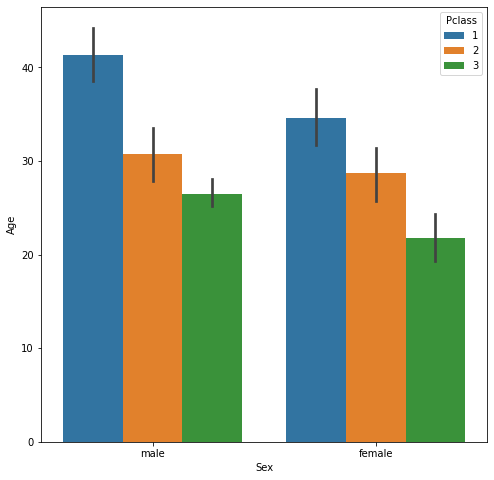

In [52]:
plt.figure(figsize=(8,8))
sb.barplot(x="Sex", y="Age", hue="Pclass", data=test)
plt.show()

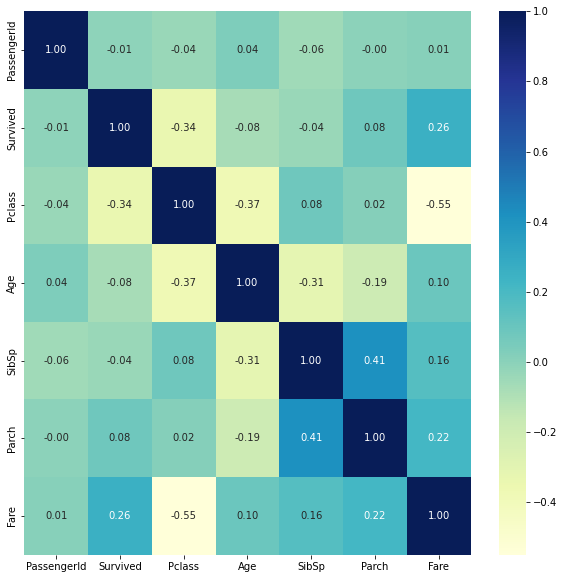

In [53]:
plt.subplots(figsize=(10, 10))
sb.heatmap(test.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

/Users/pradeepvallepalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


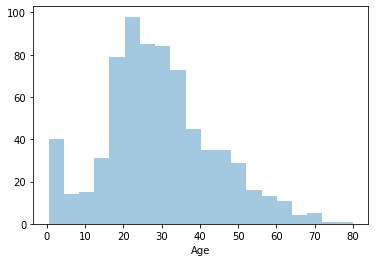

In [54]:
sb.distplot(test['Age'],kde=False)
plt.show()

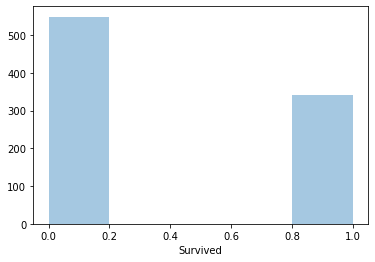

In [55]:
sb.distplot(test['Survived'],kde=False)
plt.show()

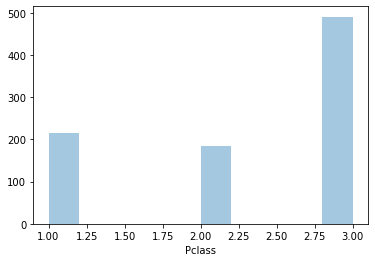

In [56]:
sb.distplot(test['Pclass'],kde=False)
plt.show()

# Using Barplot
The barplot() shows the relation between a categorical variable and a continuous variable. The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category. Bar plot represents the estimate of central tendency.

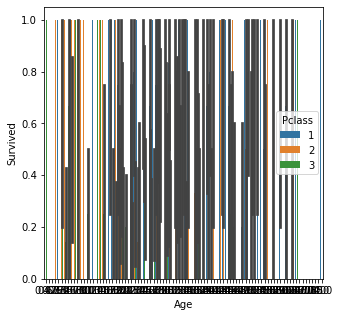

In [57]:
plt.figure(figsize=(5,5))
sb.barplot(x="Age", y="Survived", hue="Pclass", data=test)
plt.show()